In [12]:
# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

%watermark -a 'Ethen' -d -t -v -p numpy,pandas,sklearn,matplotlib

Ethen 2018-07-09 18:41:17 

CPython 3.6.4
IPython 6.4.0

numpy 1.14.5
pandas 0.23.0
sklearn 0.19.1
matplotlib 2.2.2


In [1]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

/Users/mingyuliu/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# different robots are denoted by the id column
# and there are 6 different sensors
timeseries

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
5,1,5,-1,-1,63,-3,-1,0
6,1,6,-1,-1,63,-3,0,0
7,1,7,-1,-1,63,-3,-1,0
8,1,8,-1,-1,63,-3,-1,0
9,1,9,-1,-1,61,-3,0,0


In [3]:
from time import time
from tsfresh import extract_relevant_features

start = time()

df_features = extract_relevant_features(timeseries, y,
                                        column_id='id', column_sort='time')
end = time()
print('elasped: ', end - start)

Feature Extraction: 100%|██████████| 20/20 [00:10<00:00,  1.95it/s]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


elasped:  18.316176891326904


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [14]:
feature_names = df_features.columns

X_train, X_test, y_train, y_test = train_test_split(
    df_features, y, test_size=.4)

In [10]:
tree = RandomForestClassifier()
tree.fit(X_train, y_train)
print(classification_report(y_test, tree.predict(X_test)))

             precision    recall  f1-score   support

      False       1.00      1.00      1.00        25
       True       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        36



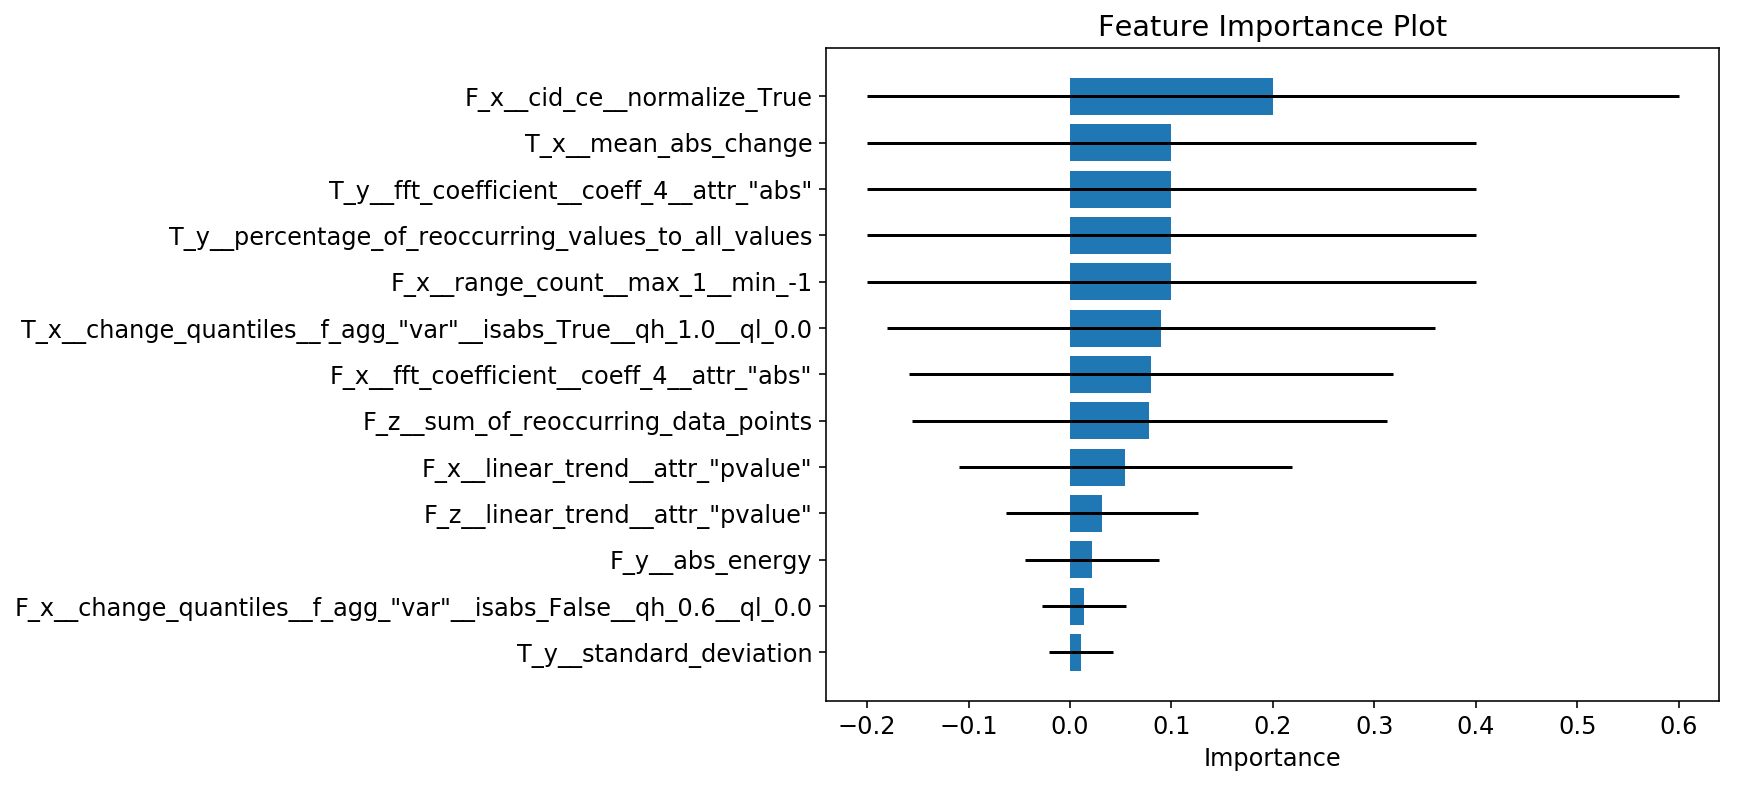

In [15]:
def vis_importance(estimator, feature_names, threshold=0.05, filtered_names=None):
    """
    Visualize the relative importance of predictors.

    Parameters
    ----------
    estimator : sklearn-like ensemble tree model
        A tree estimator that contains the attribute
        ``feature_importances_``.

    feature_names : str 1d array or list[str]
        Feature names that corresponds to the
        feature importance.

    threshold : float, default 0.05
        Features that have importance scores lower than this
        threshold will not be presented in the plot, this assumes
        the feature importance sum up to 1.

    filtered_names : str 1d array or list[str], default None
        Feature names that we wish to exclude from the visualization
        regardless of whether they were in the top features or not.
    """
    if not hasattr(estimator, 'feature_importances_'):
        msg = '{} does not have the feature_importances_ attribute'
        raise ValueError(msg.format(estimator.__class__.__name__))

    imp = estimator.feature_importances_
    feature_names = np.array(feature_names)
    if filtered_names is not None:
        keep = ~np.in1d(feature_names, filtered_names, assume_unique=True)
        mask = np.logical_and(imp > threshold, keep)
    else:
        mask = imp > threshold

    importances = imp[mask]
    idx = np.argsort(importances)
    scores = importances[idx]
    names = feature_names[mask]
    names = names[idx]

    y_pos = np.arange(1, len(scores) + 1)
    if hasattr(estimator, 'estimators_'):
        # apart from the mean feature importance, for scikit-learn we can access
        # each individual tree's feature importance and compute the standard deviation
        tree_importances = np.array([tree.feature_importances_
                                     for tree in estimator.estimators_])
        importances_std = np.std(tree_importances[:, mask], axis=0)
        scores_std = importances_std[idx]
        plt.barh(y_pos, scores, align='center', xerr=scores_std)
    else:
        plt.barh(y_pos, scores, align='center')

    plt.yticks(y_pos, names)
    plt.xlabel('Importance')
    plt.title('Feature Importance Plot')


# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12
vis_importance(tree, feature_names, threshold=0.01)